<a href="https://colab.research.google.com/github/belalE/Data-Science-Salaries-Analysis/blob/main/Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Salaries


Columns
1.   work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year


*   EN, refers to Entry-level / Junior.
* MI, refers to Mid-level / Intermediate.
* SE, refers to Senior-level / Expert.
* EX, refers to Executive-level / Director.


3. employment_type: The type of employment for the role

* PT,refers to Part-time
* FT,refers to Full-time
* CT,refers to Contract
* FL,refers to Freelance

4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv")
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
list(data.columns)

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [4]:
data.drop(["salary","salary_currency"], axis=1, inplace=True)

In [ ]:
data.describe(include="object")

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755
unique,4,4,93,78,72,3
top,SE,FT,Data Engineer,US,US,M
freq,2516,3718,1040,3004,3040,3153


In [ ]:
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 3755
Columns: 9


## Distribution of salary based on different factors

### Distribution of salary

<Axes: xlabel='salary_in_usd', ylabel='Count'>

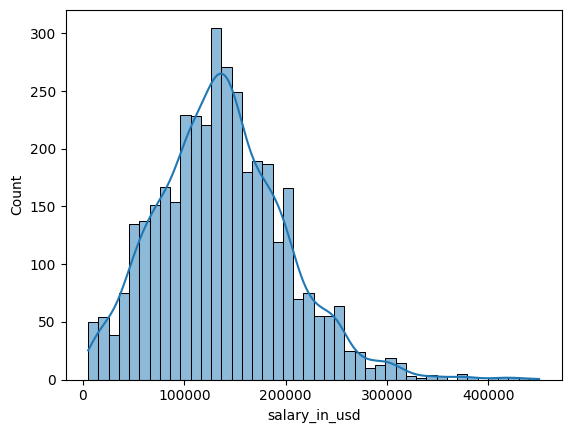

In [ ]:
sns.histplot(data['salary_in_usd'], kde=True)

<ipython-input-18-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

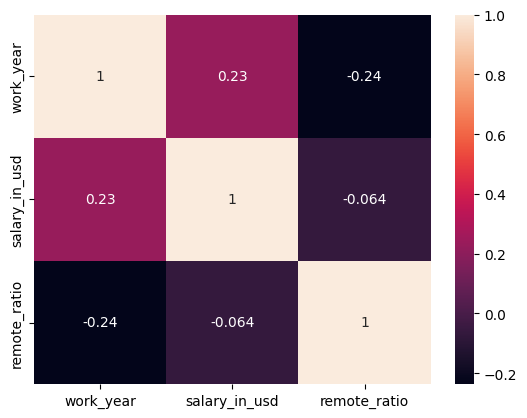

In [18]:
sns.heatmap(data.corr(), annot=True)

### Salary and work year

<Axes: xlabel='salary_in_usd', ylabel='Count'>

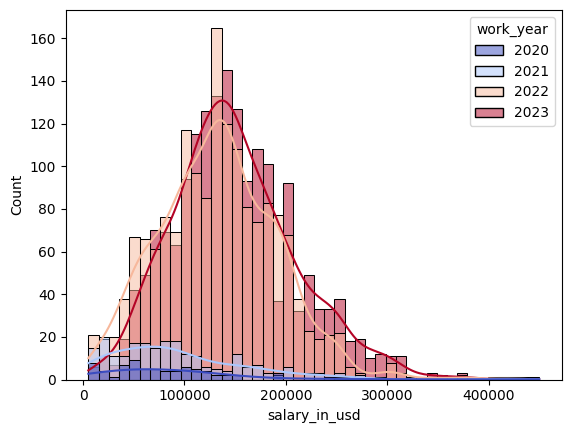

In [ ]:
sns.histplot(x='salary_in_usd', data=data, hue="work_year", kde=True,  palette="coolwarm")

<Axes: title={'center': 'Growth of Data Science Salaries over time'}, xlabel='work_year', ylabel='salary_in_usd'>

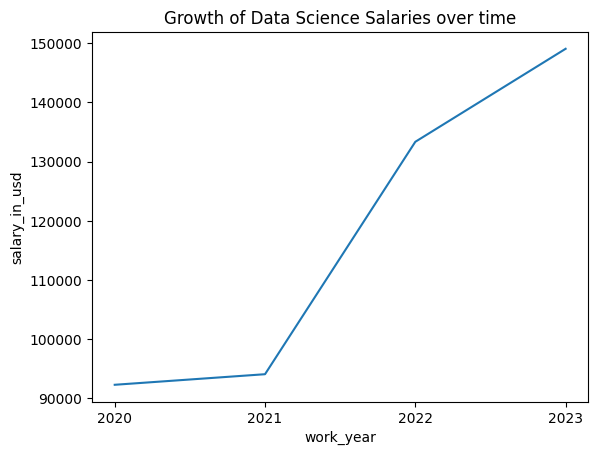

In [ ]:

plt.title("Growth of Data Science Salaries over time")
salary_by_year = data['salary_in_usd'].groupby(data['work_year']).mean()
plt.xticks([2020,2021,2022,2023])
sns.lineplot(salary_by_year)

### Salary and employment type

In [ ]:
salary_by_employment = data['salary_in_usd'].groupby(data['employment_type']).mean()
salary_by_employment

employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64

<Axes: title={'center': 'Data Science Salaries by Employment Type'}, ylabel='Salary in USD'>

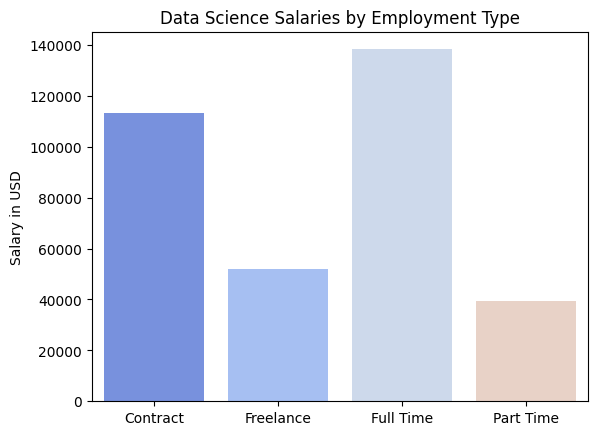

In [ ]:
plt.title("Data Science Salaries by Employment Type")
plt.ylabel('Salary in USD')
sns.barplot(x=['Contract','Freelance','Full Time','Part Time'],y=salary_by_employment.values)

<Axes: xlabel='salary_in_usd', ylabel='employment_type'>

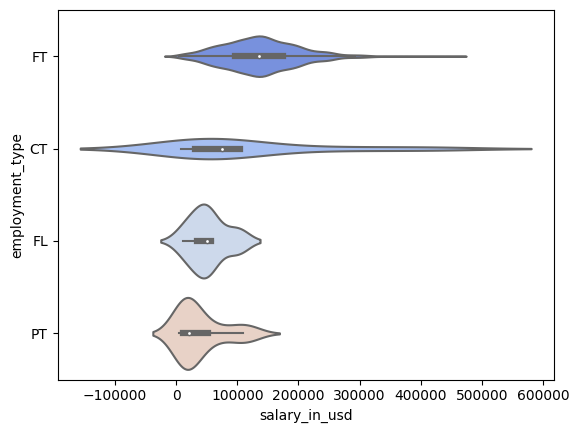

In [ ]:
sns.violinplot(data=data, x='salary_in_usd',y='employment_type')

In [ ]:
data['salary_in_usd'].groupby(data['employment_type']).describe()

,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,10.0,113446.900000,130176.746842,7500.0,30117.25,75000.0,103750.0,416000.0
FL,10.0,51807.800000,29458.879336,12000.0,34281.00,50000.0,57500.0,100000.0
FT,3718.0,138314.199570,62452.177613,5132.0,95599.00,135000.0,175075.0,450000.0
PT,17.0,39533.705882,38312.145181,5409.0,12000.00,21669.0,52533.0,125404.0


While full time work has the highest average pay, contract work has a larger spread, as evident by the larger standard deviation.

### Salary and Job Title

In [ ]:
print(data['job_title'].nunique())

93


<Axes: title={'center': 'Top 25 Job Titles by Salary'}, xlabel='salary_in_usd', ylabel='job_title'>

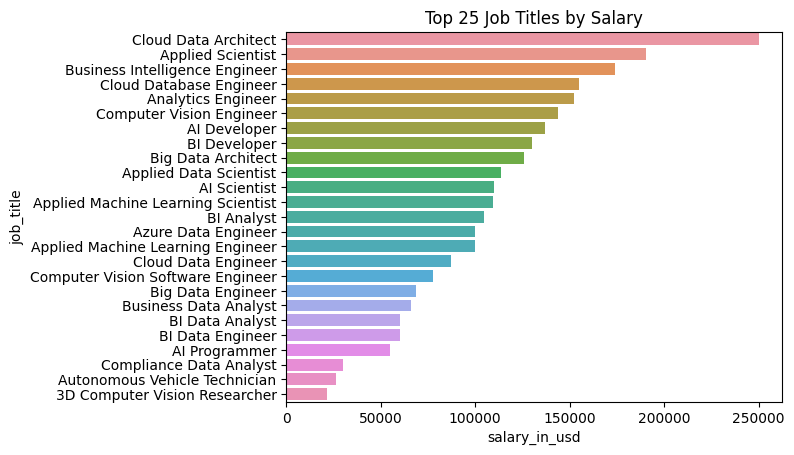

In [ ]:
plt.title('Top 25 Job Titles by Salary')
job_titles_data = data[['job_title', 'salary_in_usd']]
job_titles_data = job_titles_data.groupby(job_titles_data['job_title']).mean().round(0).head(25).sort_values('salary_in_usd',ascending = False).reset_index()
sns.barplot(y='job_title',x='salary_in_usd',data=job_titles_data)

### Salary and Employee Residence


In [ ]:
data['employee_residence'].nunique()

78

<Axes: title={'center': 'Top 15 Countries by Salary'}, xlabel='salary_in_usd', ylabel='employee_residence'>

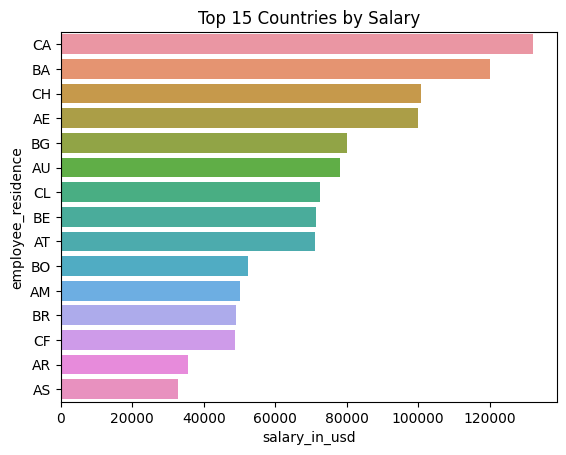

In [ ]:
plt.title('Top 15 Countries by Salary')
countries_data = data[['employee_residence', 'salary_in_usd']]
countries_data = countries_data.groupby(countries_data['employee_residence']).mean().round(0).head(15).sort_values('salary_in_usd',ascending = False).reset_index()
sns.barplot(y='employee_residence',x='salary_in_usd',data=countries_data)

In [ ]:
import plotly.graph_objects as go

In [ ]:
pip install pycountry-convert

In [ ]:
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

data['employee_residence_3'] = data.employee_residence.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
data['employee_residence_name'] = data.employee_residence.apply(lambda x: country_alpha2_to_country_name(x))

In [ ]:
countries_data = data[['employee_residence_3', 'salary_in_usd','employee_residence_name']]
countries_data = countries_data.groupby(countries_data['employee_residence_3']).mean(numeric_only=True).round(0).sort_values('salary_in_usd',ascending = False).reset_index()
map_data =dict(
        type = 'choropleth',
        locations = countries_data['employee_residence_3'],
        z = countries_data['salary_in_usd'],
        # text = countries_data['employee_residence_name'],
        colorbar = {'title' : 'Salary in USD'},
      )
layout = dict(
    title = 'Mean Data Science Salary in USD',
    geo = dict(
        showframe = True,
        projection = {'type':'mercator'}
    )
)

In [ ]:
choromap = go.Figure(data = [map_data],layout = layout)
choromap.show()

### Salary and Remote Ratio

In [ ]:
data['remote_ratio']

0       100
1       100
2       100
3       100
4       100
       ... 
3750    100
3751    100
3752    100
3753    100
3754     50
Name: remote_ratio, Length: 3755, dtype: int64

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

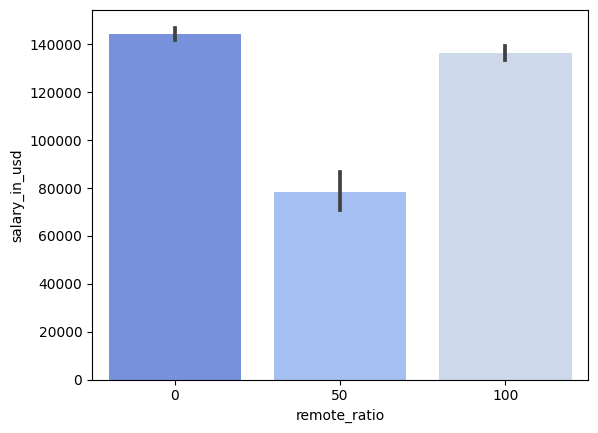

In [ ]:
sns.barplot(x='remote_ratio',y='salary_in_usd',data=data)

Both in person employees (0% remote) and fully remote employees (100%) have a higher salary on average than hybrid data scientists.

### Salary and Company Location

<Axes: title={'center': 'Top 15 Countries by Salary'}, xlabel='salary_in_usd', ylabel='company_location'>

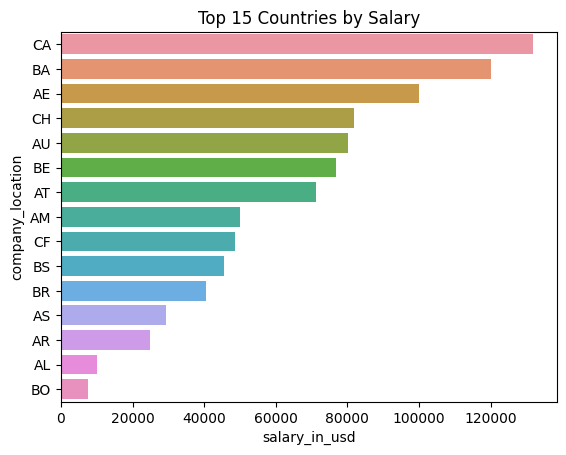

In [ ]:
plt.title('Top 15 Countries by Salary')
companies_data = data[['company_location', 'salary_in_usd']]
companies_data = companies_data.groupby(companies_data['company_location']).mean().round(0).head(15).sort_values('salary_in_usd',ascending = False).reset_index()
sns.barplot(y='company_location',x='salary_in_usd',data=companies_data)

In [ ]:
data['company_location_3'] = data.company_location.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
data['company_location_name'] = data.company_location.apply(lambda x: country_alpha2_to_country_name(x))

In [ ]:
locations_data = data[['company_location_3', 'salary_in_usd','company_location_name']]
locations_data = locations_data.groupby(locations_data['company_location_3']).mean(numeric_only=True).round(0).sort_values('salary_in_usd',ascending = False).reset_index()
company_map_data =dict(
        type = 'choropleth',
        locations = locations_data['company_location_3'],
        z = locations_data['salary_in_usd'],
        # text = locations_data['company_location_name'],
        colorbar = {'title' : 'Salary in USD'},
      )
location_layout = dict(
    title = 'Mean Data Science Salary in USD',
    geo = dict(
        showframe = True,
        projection = {'type':'mercator'}
    )
)

In [ ]:
company_choromap = go.Figure(data = [company_map_data],layout = layout)
company_choromap.show()

### Salary and Company Size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

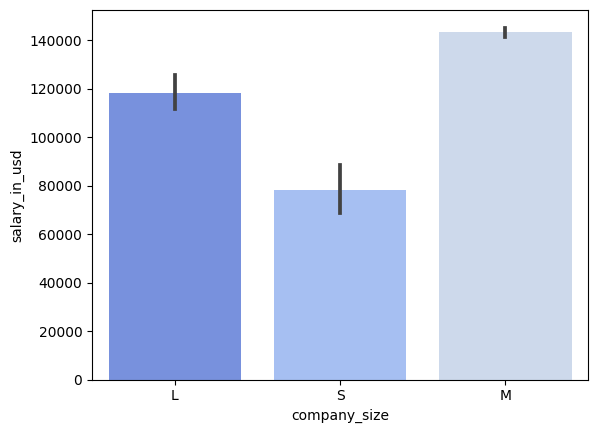

In [ ]:
sns.barplot(x='company_size',y='salary_in_usd',data=data)

# Data Science Salary Regression Model

## Linear Regression

### Prepping Data

In [51]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [54]:
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train Test Split

In [55]:
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training Model

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [59]:
print(lm.intercept_)

729496960742525.4


In [66]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

<Axes: >

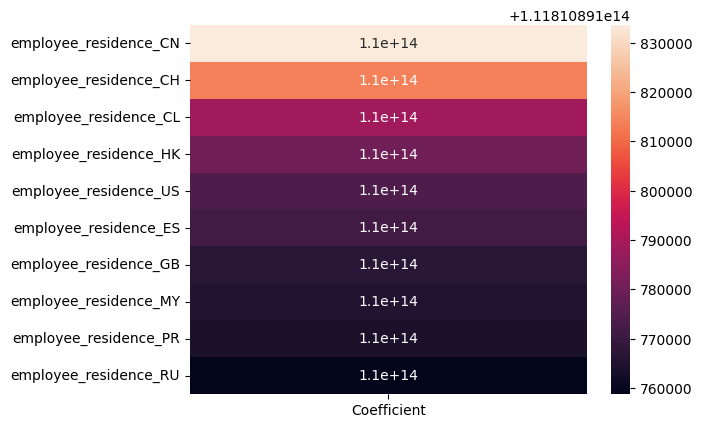

In [67]:
sns.heatmap(coeff_df.sort_values(by='Coefficient', ascending=False).head(10), annot=True)

### Predictions from the Model

In [68]:
predictions = lm.predict(X_test)

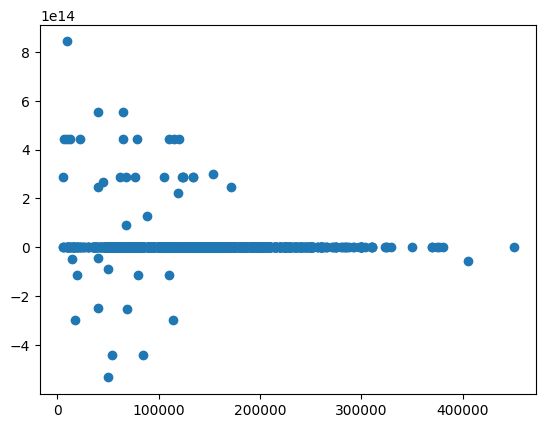

In [69]:
plt.scatter(y_test,predictions)

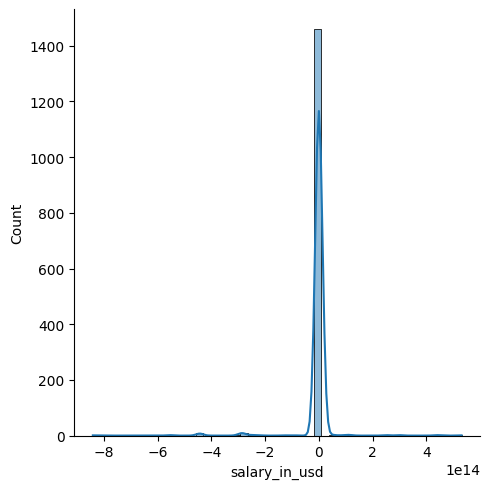

In [70]:
sns.displot((y_test-predictions),bins=50, kde=True);

In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8909188944072.635
MSE: 3.5250150550515003e+27
RMSE: 59371837221459.64


## Decision Tree Regressor

### Prepping Data

In [77]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [78]:
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training Model

In [80]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Predictions from Model

In [81]:
y_pred = regressor.predict(X_test)

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 39241.28311490169
MSE: 2876317009.14014
RMSE: 53631.30624122575


## Random Forest Regression

### Data Prep and Train Test Split

In [ ]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Training Model

In [84]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 101)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=101)

### Predictions from Model

In [85]:
y_pred = regressor.predict(X_test)

In [86]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36339.12430913852
MSE: 2424384183.1914825
RMSE: 49238.03593962175


## Support Vector Regression

Data Prep and Train Test Split

In [101]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# # Scaling Data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

ValueError: ignored

Training Model

In [94]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

### Predictions from Model

In [95]:
y_pred = regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred)

In [96]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 49224.40367460222
MSE: 4025343062.6366425
RMSE: 63445.59135697801


In [99]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

InvalidIndexError: ignored